In [1]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
def plot_feature_importances(feature_importances, title, feature_names):
    # normalizar los valores 
    feature_importances = 100.0 * (feature_importances / max(feature_importances))

    # ordenar por orden de importancia
    index_sorted = np.flipud(np.argsort(feature_importances))

    # obtener porcentaje de importancia
    pos = np.arange(index_sorted.shape[0])

    # pintar la barra con el porcentaje
    plt.figure()
    plt.bar(pos, feature_importances[index_sorted], align='center')
    plt.xticks(pos, feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show()


#### Decision Tree performance ####
Mean squared error = 14.79
Explained variance score = 0.82

#### Decision Tree Features ####
[ 0.03856422  0.          0.          0.          0.02908806  0.62202035
  0.00078264  0.10473383  0.          0.          0.00460542  0.
  0.20020548]
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


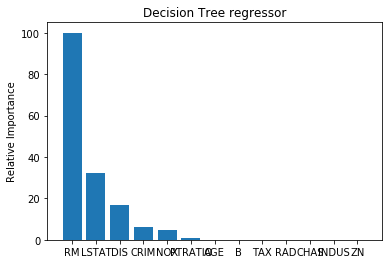

In [3]:
# Cargar dataset boston
housing_data = datasets.load_boston() 

# mezclamos los datos
X, y = shuffle(housing_data.data, housing_data.target, random_state=7)

# Dividir los datos en 80% para entrenamiento y 20% para test
num_training = int(0.8 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]

# Entrenar los datos con el modelo  de regresion arbol decision
dt_regressor = DecisionTreeRegressor(max_depth=4)
dt_regressor.fit(X_train, y_train)


# Evaluar el rendimiento de nuestro modelo
y_pred_dt = dt_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred_dt)
evs = explained_variance_score(y_test, y_pred_dt) 
print("\n#### Decision Tree performance ####")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

print("\n#### Decision Tree Features ####")
print(dt_regressor.feature_importances_)
print(housing_data.feature_names)

# Pintar en un grafico los atributos mas importantes
plot_feature_importances(dt_regressor.feature_importances_, 
                'Decision Tree regressor', housing_data.feature_names)
